In [69]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio


import math


In [70]:
df = pd.read_csv("gtzan/features_30_sec.csv")
df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516           213843.755497  ...   55.356403   
2              1747.702312            76254.192257  ...   40.598766   
3              1596.412872           166441.494769  ...   44.427753   
4              1748.172116            88445.209036  ...   86.099236   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -1.690215   36.524071    -0.408979   41.597103    -2.303523   55.062923   
1    -0.731125   60.314529     0.295073   48.120598    -0.283518   51.106190   
2    -7.729093   47.639427    -1.816407   52.382141    -3.439720   46.639660   
3    -3.319597   50.206673     0.636965   37.319130    -0.619121   37.259739   
4    -5.454034   75.269707    -0.916874   53.613918    -4.404827   62.910812   

   mfcc20_mean  mfcc20_var  label  
0     1.221291   46.936035  blues  
1     0.531217   45.786282  blues  
2    -2.231258   30.573025  blues  
3    -3.407448   31.949339  blues  
4   -11.703234   55.195160  blues  

[5 rows x 60 columns]

In [71]:
df_with_filename = df
df=df.drop(labels="filename",axis=1)

In [72]:
from sklearn.preprocessing import StandardScaler
fit=StandardScaler()
X=fit.fit_transform(np.array(df.iloc[:,:-1],dtype=float))

In [73]:
from scipy.spatial.distance import cdist
distances = cdist(X, X, 'cosine') #cosine distance

dist_df = pd.DataFrame(distances)
dist_df = dist_df.set_index(df_with_filename.filename)
dist_df.columns = df_with_filename.filename
dist_df

filename         blues.00000.wav  blues.00001.wav  blues.00002.wav  \
filename                                                             
blues.00000.wav         0.000000         0.949983         0.410009   
blues.00001.wav         0.949983         0.000000         1.096103   
blues.00002.wav         0.410009         1.096103         0.000000   
blues.00003.wav         0.714553         0.478814         0.789059   
blues.00004.wav         0.973769         0.918802         0.599412   
...                          ...              ...              ...   
rock.00095.wav          0.388801         1.076715         0.503988   
rock.00096.wav          0.358985         1.221527         0.432941   
rock.00097.wav          0.503448         1.301984         0.409832   
rock.00098.wav          0.714468         0.500146         0.783105   
rock.00099.wav          0.695210         0.687794         0.678386   

filename         blues.00003.wav  blues.00004.wav  blues.00005.wav  \
filename                                                             
blues.00000.wav         0.714553         0.973769         1.345977   
blues.00001.wav         0.478814         0.918802         0.691928   
blues.00002.wav         0.789059         0.599412         1.081600   
blues.00003.wav         0.000000         0.873133         0.864919   
blues.00004.wav         0.873133         0.000000         0.443821   
...                          ...              ...              ...   
rock.00095.wav          0.999738         0.936122         1.230621   
rock.00096.wav          0.979008         0.936077         1.271852   
rock.00097.wav          1.107318         0.826747         1.175656   
rock.00098.wav          0.497429         0.846398         0.823383   
rock.00099.wav          0.816208         0.937665         0.947176   

filename         blues.00006.wav  blues.00007.wav  blues.00008.wav  \
filename                                                             
blues.00000.wav         1.218991         1.167032         0.357843   
blues.00001.wav         0.681576         0.584565         0.878817   
blues.00002.wav         1.027766         0.895219         0.531522   
blues.00003.wav         0.699109         0.675221         0.646845   
blues.00004.wav         0.517721         0.376451         0.969807   
...                          ...              ...              ...   
rock.00095.wav          1.250778         1.180250         0.380338   
rock.00096.wav          1.291227         1.255816         0.387644   
rock.00097.wav          1.202778         1.155430         0.538440   
rock.00098.wav          0.747501         0.760315         0.544998   
rock.00099.wav          0.934177         0.930978         0.595705   

filename         blues.00009.wav  ...  rock.00090.wav  rock.00091.wav  \
filename                          ...                                   
blues.00000.wav         1.097116  ...        1.082385        0.453671   
blues.00001.wav         0.595542  ...        1.097800        1.324599   
blues.00002.wav         1.131897  ...        1.032081        0.438769   
blues.00003.wav         0.704468  ...        1.319713        1.206035   
blues.00004.wav         0.528127  ...        0.912189        0.982316   
...                          ...  ...             ...             ...   
rock.00095.wav          1.257846  ...        0.975826        0.156234   
rock.00096.wav          1.304107  ...        1.033590        0.128739   
rock.00097.wav          1.329566  ...        1.008123        0.085807   
rock.00098.wav          0.770233  ...        1.232952        0.881807   
rock.00099.wav          0.916043  ...        0.967618        0.669144   

filename         rock.00092.wav  rock.00093.wav  rock.00094.wav  \
filename                                                          
blues.00000.wav        0.421351        0.337212        0.428234   
blues.00001.wav        1.370299        1.191072        1.330310   
blues.00002.wav        0.409112        0.416469  

In [74]:
audio_recording="gtzan/genres_original/disco/disco.00014.wav"
data,sr=librosa.load(audio_recording)
print(type(data),type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [75]:
librosa.load(audio_recording,sr=45600)

(array([ 0.20199575,  0.2017867 ,  0.14749824, ..., -0.2261146 ,
        -0.14971119,  0.        ], dtype=float32),
 45600)

In [76]:
import IPython
IPython.display.Audio(data,rate=sr)

C:\Users\Dude\AppData\Local\Temp\ipykernel_23388\3333955140.py:2: FutureWarning: Pass y=[ 0.20974731  0.13619995  0.14807129 ... -0.16918945 -0.19021606
 -0.21813965] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(data, sr=sr)[0]


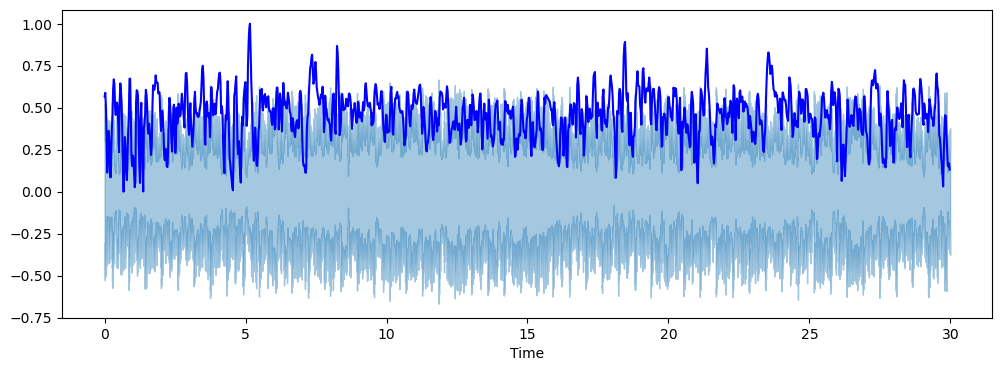

In [77]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(data, sr=sr)[0]
spectral_centroids.shape

# Вычисление временной переменной для визуализации
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
y_harmonic, y_percussive = librosa.effects.hpss(data)
# Нормализация спектрального центроида для визуализации
def normalize(y, axis=0):
    return sklearn.preprocessing.minmax_scale(y, axis=axis)
# Построение спектрального центроида вместе с формой волны
librosa.display.waveshow(data, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')


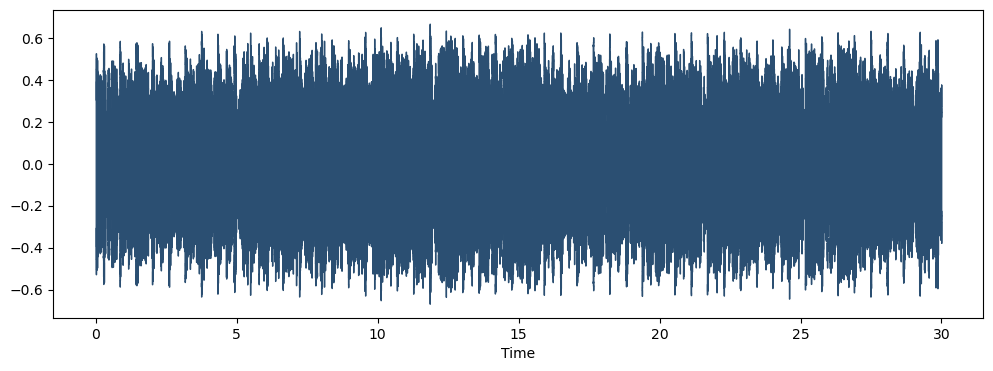

In [78]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(data,color="#2B4F72")
plt.show()

e:\anaconda\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


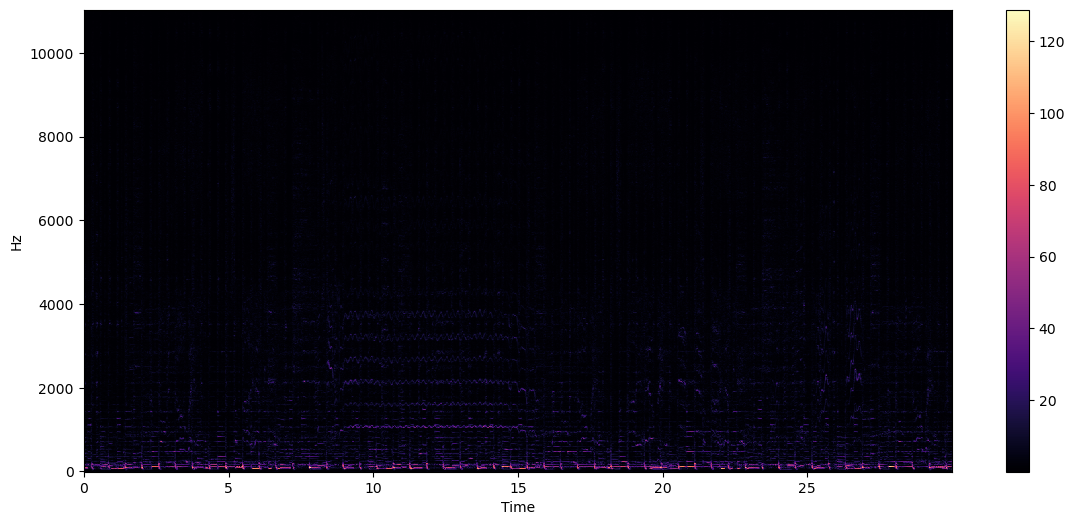

In [79]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

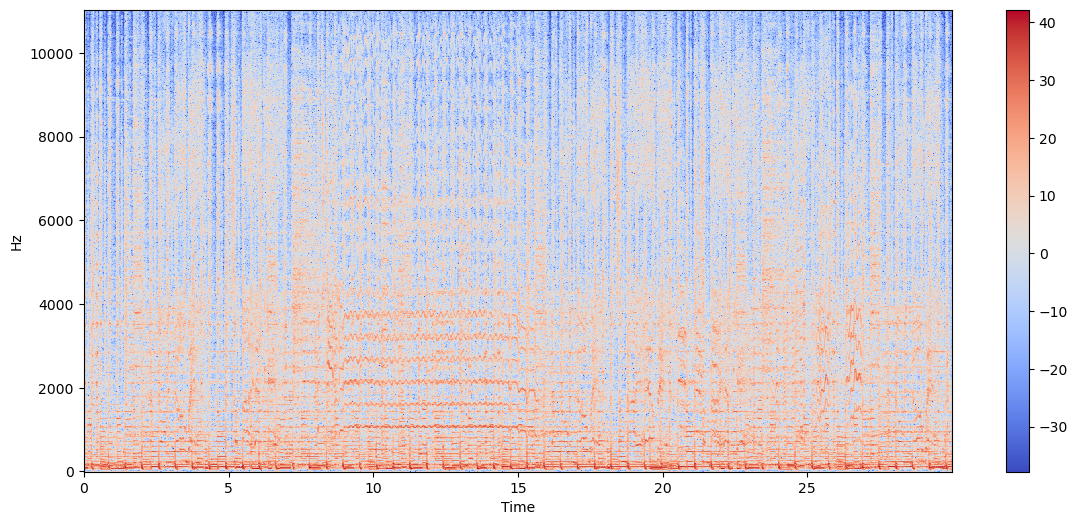

In [80]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

C:\Users\Dude\AppData\Local\Temp\ipykernel_23388\742313470.py:1: FutureWarning: Pass y=[ 0.21974732  0.14619996  0.1580713  ... -0.15918945 -0.18021606
 -0.20813964] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff=librosa.feature.spectral_rolloff(data+0.01,sr=sr)[0]


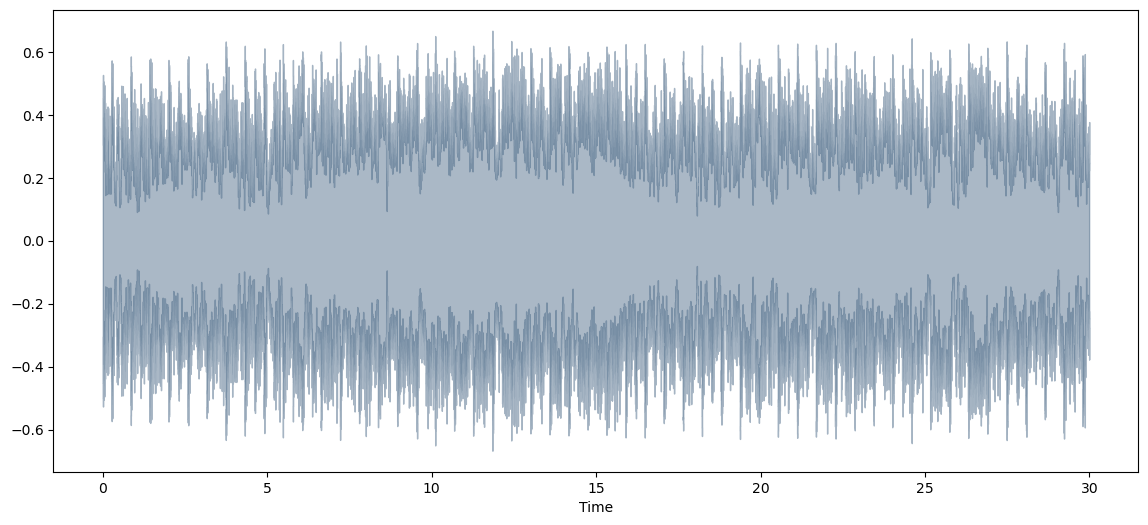

In [81]:
spectral_rolloff=librosa.feature.spectral_rolloff(data+0.01,sr=sr)[0]
plt.figure(figsize=(14,6))
librosa.display.waveshow(data,sr=sr,alpha=0.4,color="#2B4F72")

C:\Users\Dude\AppData\Local\Temp\ipykernel_23388\1146563947.py:2: FutureWarning: Pass y=[ 0.20974731  0.13619995  0.14807129 ... -0.16918945 -0.19021606
 -0.21813965] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(data,sr=sr)


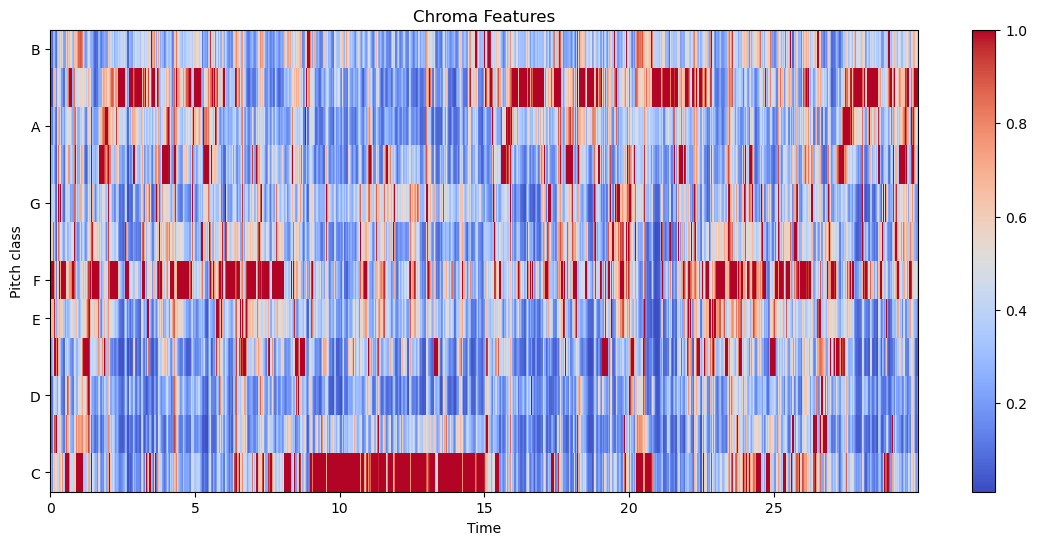

In [82]:
import librosa.display as lplt
chroma = librosa.feature.chroma_stft(data,sr=sr)
plt.figure(figsize=(14,6))
lplt.specshow(chroma,sr=sr,x_axis="time",y_axis="chroma",cmap="coolwarm")
plt.colorbar()
plt.title("Chroma Features")
plt.show()

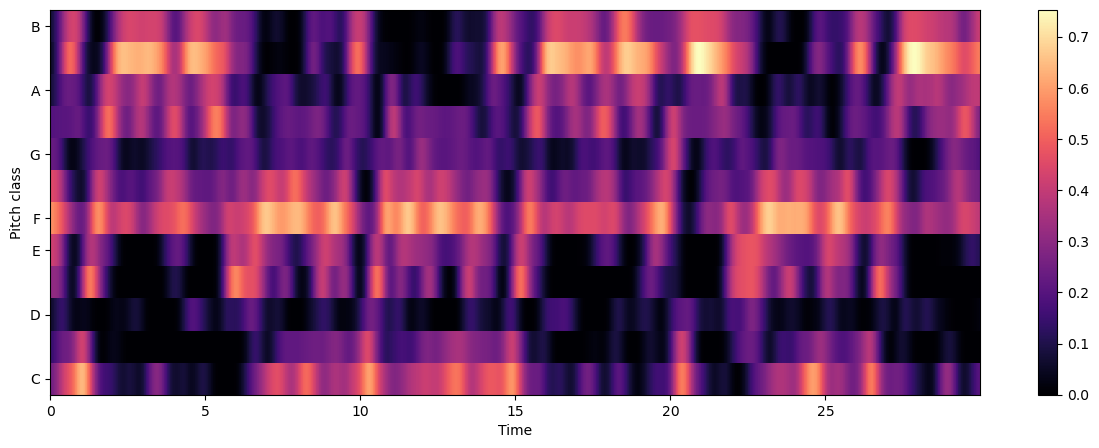

In [83]:
#Chroma Energy Normalized (CENS)
chroma=librosa.feature.chroma_cens(y=y_harmonic, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chroma,y_axis='chroma', x_axis='time')
plt.colorbar()

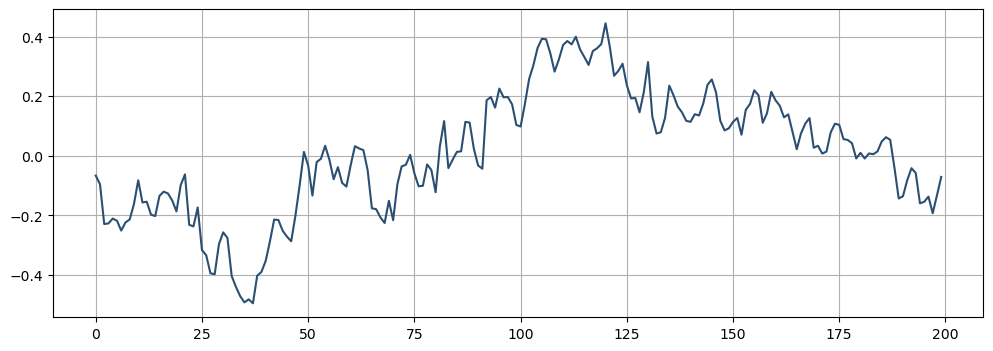

In [84]:
start=1000
end=1200
plt.figure(figsize=(12,4))
plt.plot(data[start:end],color="#2B4F72")
plt.grid()

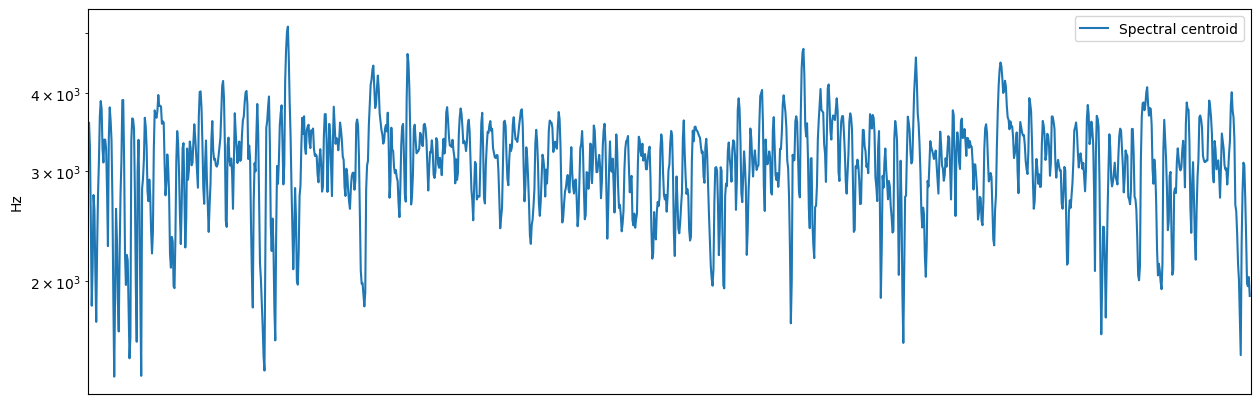

In [85]:
# Spectral Centroid
cent = librosa.feature.spectral_centroid(y=data, sr=sr)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()

Text(0.5, 1.0, 'MFCC')

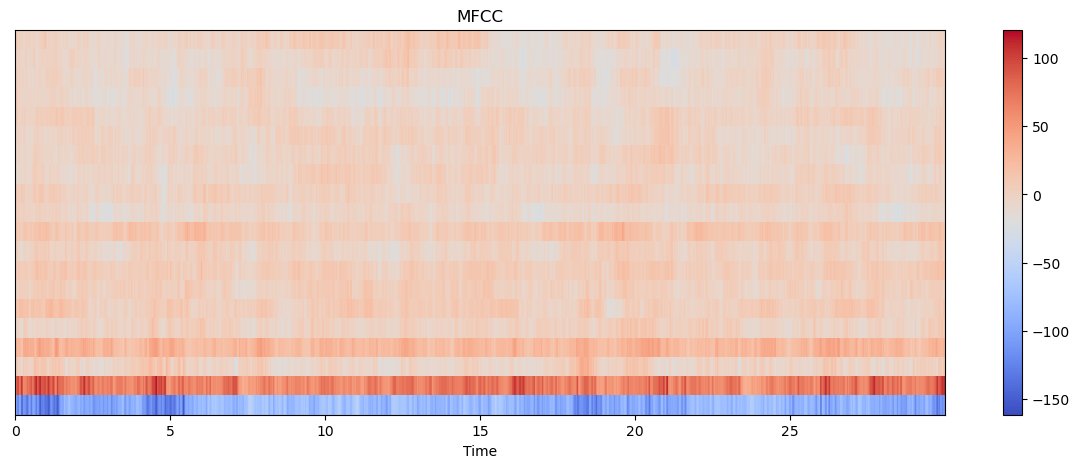

In [86]:
# Calculate MFCCs

mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=20)
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')